# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.10000000149011612


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import random
from collections import deque, namedtuple

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        self.device = device
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([np.expand_dims(e.state, axis=0) for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([np.expand_dims(e.action, axis=0) for e in experiences if e is not None])).float().to(self.device)
        rewards = torch.from_numpy(np.vstack([np.expand_dims(e.reward, axis=0) for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([np.expand_dims(e.next_state, axis=0) for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([np.expand_dims(e.done, axis=0) for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [8]:
import copy

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, scale=1.0, scale_decay=1.0, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.initial_scale = scale
        self.scale = scale
        self.scale_decay = scale_decay
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)
        self.scale = self.initial_scale

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        # dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        scale = self.scale
        self.scale *= self.scale_decay
        return self.state * scale

In [9]:
# https://github.com/ikostrikov/pytorch-ddpg-naf/blob/master/ddpg.py#L11
def soft_update(target, source, tau):
    """
    Perform DDPG soft update (move target params toward source based on weight
    factor tau)
    Inputs:
        target (torch.nn.Module): Net to copy parameters to
        source (torch.nn.Module): Net whose parameters to copy
        tau (float, 0 < x < 1): Weight factor for update
    """
    for target_param, param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_(target_param.data * (1.0 - tau) + param.data * tau)

# https://github.com/ikostrikov/pytorch-ddpg-naf/blob/master/ddpg.py#L15
def hard_update(target, source):
    """
    Copy network parameters from source to target
    Inputs:
        target (torch.nn.Module): Net to copy parameters to
        source (torch.nn.Module): Net whose parameters to copy
    """
    for target_param, param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_(param.data)

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

In [10]:
import torch
import torch.nn as nn
import numpy as np


class Network(nn.Module):
    def __init__(
        self, 
        in_size: int,
        out_size: int,
        fc1: int=256,
        fc2: int=128,
        fc3: int=64,
        is_actor: bool=True) -> None:

        super().__init__()
        self.fc1 = nn.Linear(in_size, fc1)
        self.do1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(fc1, fc2)
        self.fc3 = nn.Linear(fc2, fc3)
        self.fc4 = nn.Linear(fc3, out_size)
        self.is_actor = is_actor
        self.reset_parameters()
    
    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(*hidden_init(self.fc3))
        self.fc4.weight.data.uniform_(-1e-3, 1e-3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.do1(x)
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        if self.is_actor:
            return torch.tanh(self.fc4(x))
        else:
            return self.fc4(x)

In [11]:
import torch.optim as optim

class DDPGAgent:
    def __init__(
        self,
        in_actor: int,
        out_actor: int,
        in_critic: int,
        random_seed: int,
        lr_actor: float = 5e-4,
        lr_critic: float = 5e-4,
        noise_scale: float = 2.0,
        noise_decay: float = 0.9999,
        device: str = "cpu"
        ) -> None:
        
        np.random.seed(random_seed)
        torch.manual_seed(random_seed)

        self.actor = Network(in_actor, out_actor, is_actor=True).to(device)
        self.critic = Network(in_critic, 1, is_actor=False).to(device)
        self.actor_target = Network(in_actor, out_actor, is_actor=True).to(device)
        self.critic_target = Network(in_critic, 1, is_actor=False).to(device)

        self.noise = OUNoise(out_actor, random_seed, scale=noise_scale, scale_decay=noise_decay)

        hard_update(self.actor_target, self.actor)
        hard_update(self.critic_target, self.critic)

        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=lr_actor)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=lr_critic, weight_decay=0)

        self.device = device
        self.random_seed = random_seed

    def act(self, obs, add_noise=True):
        obs = torch.from_numpy(obs).float().to(self.device)
        
        self.actor.eval()
        with torch.no_grad():
            action = self.actor(obs).cpu().data.numpy()
        self.actor.train()

        if add_noise:
            action += self.noise.sample()

        return np.clip(action, -1, 1)

    def target_act(self, obs, add_noise=True):
        obs = torch.from_numpy(obs).float().to(self.device)
        
        self.actor.eval()
        with torch.no_grad():
            action = self.actor_target(obs).cpu().data.numpy()
        self.actor.train()

        if add_noise:
            action += self.noise.sample()
            
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()


In [12]:
from typing import Optional
from tensorboardX import SummaryWriter

class MADDPG:
    def __init__(
        self, 
        in_actor: int,
        out_actor: int,
        in_critic: int,
        random_seed: int,
        buffer_size: int=int(1e6),
        batch_size: int=128,
        gamma: float=0.95, 
        tau: float=0.02,
        lr_actor: float=1e-4,
        lr_critic: float=1e-4,
        noise_scale: float=1.0,
        noise_decay: float=9e-4,
        device: str = "cpu",
        logger: Optional[SummaryWriter] = None
        ) -> None:

        # For each agent in the environment
        self.maddpg_agents = [
            DDPGAgent(
                in_actor, 
                out_actor, 
                in_critic, 
                random_seed=random_seed, 
                device=device, 
                lr_actor=lr_actor, 
                lr_critic=lr_critic,
                noise_scale=noise_scale,
                noise_decay=noise_decay),
            DDPGAgent(
                in_actor, 
                out_actor, 
                in_critic, 
                random_seed=random_seed, 
                device=device, 
                lr_actor=lr_actor, 
                lr_critic=lr_critic,
                noise_scale=noise_scale,
                noise_decay=noise_decay)
        ]
        self.num_agents = len(self.maddpg_agents)

        self.memory = ReplayBuffer(buffer_size, batch_size, random_seed, device)

        self.gamma = gamma
        self.tau = tau
        self.device = device
        self.batch_size = batch_size
        self.logger = logger
        self.iter = 0

    def get_actors(self):
        return [agent.actor for agent in self.maddpg_agents]

    def get_target_actors(self):
        return [agent.target_act for agent in self.maddpg_agents]

    def act(self, obs_all_agents, add_noise=True):
        return [agent.act(obs, add_noise) for agent, obs in zip(self.maddpg_agents, obs_all_agents)]

    def target_act(self, obs_all_agents, add_noise=True):
        actions = [agent.target_act(obs_all_agents[:, i, :].cpu().numpy(), add_noise) for i, agent in enumerate(self.maddpg_agents)]
        actions = np.stack(actions, axis=1)
        return torch.from_numpy(actions)
        # actions = [torch.from_numpy(a) for a in actions]
        # return torch.stack(actions, dim=1)


    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > self.batch_size:
            experiences = self.memory.sample()
            for i in range(self.num_agents):
                self.learn(experiences, i)
            self.update_targets()
            

    def learn(self, samples, agent_number):

        obs_full, action, reward, next_obs_full, dones = samples

        # obs = obs_full[:, agent_number, :]
        obs = obs_full
        # next_obs = next_obs_full[:, agent_number, :]
        next_obs = next_obs_full
        
        agent = self.maddpg_agents[agent_number]
        agent.critic_optimizer.zero_grad()
        target_actions = self.target_act(next_obs).to(self.device)

        next_obs_full = next_obs_full.view(self.batch_size, self.num_agents * next_obs_full.shape[-1])
        target_actions = target_actions.view(self.batch_size, self.num_agents * target_actions.shape[-1])
        target_critic_input = torch.cat((next_obs_full, target_actions), dim=1).float().to(self.device)

        with torch.no_grad():
            q_next = agent.critic_target(target_critic_input)

        
        y = reward[:, agent_number, :].view(-1, 1) + self.gamma * q_next * (1 - dones[:, agent_number, :].view(-1, 1))

        obs_full = obs_full.view(self.batch_size, self.num_agents * obs_full.shape[-1])
        action = action.view(self.batch_size, self.num_agents * action.shape[-1])
        critic_input = torch.cat((obs_full, action), dim=1).float().to(self.device)
        q = agent.critic(critic_input)

        huber_loss = torch.nn.SmoothL1Loss()
        critic_loss = huber_loss(q, y.detach())
        critic_loss.backward()
        agent.critic_optimizer.step()

        agent.actor_optimizer.zero_grad()
        q_input = []
        
        for i in range(self.num_agents):
            ob = obs[:, i, :]
            if i == agent_number:
                q_input.append(self.maddpg_agents[i].actor(ob))
            else:
                q_input.append(self.maddpg_agents[i].actor(ob).detach())

        q_input = torch.cat(q_input, dim=1)
        q_input = torch.cat((obs_full, q_input), dim=1)

        actor_loss = -agent.critic(q_input).mean()
        actor_loss.backward()
        agent.actor_optimizer.step()

        if self.logger is not None:
            al = actor_loss.cpu().detach().item()
            cl = critic_loss.cpu().detach().item()
            self.logger.add_scalars(
                f"agent-{agent_number}/losses",
                {"critic_loss": cl, "actor_loss": al},
                self.iter
                )

    def update_targets(self):
        """soft update targets"""
        self.iter += 1
        for ddpg_agent in self.maddpg_agents:
            soft_update(ddpg_agent.actor_target, ddpg_agent.actor, self.tau)
            soft_update(ddpg_agent.critic_target, ddpg_agent.critic, self.tau)

    def reset_noise(self):
        for agent in self.maddpg_agents:
            agent.reset()


        

In [13]:
from tqdm import tqdm

def maddpg(
    driver :MADDPG,
    env,
    n_episodes=1000, 
    max_t=300,
    early_stop=True
    ):
    scores_window = deque(maxlen=100)
    scores = []
    avg_scores = []
    with tqdm(total=n_episodes) as progress:
        for i_episode in range(1, n_episodes+1):
            env_info = env.reset(train_mode=True)[brain_name]
            
            states = env_info.vector_observations
            num_agents = len(env_info.agents)
            score = np.zeros(num_agents)
            driver.reset_noise()
            
            for t in range(max_t):
                actions = driver.act(states)
                env_info = env.step(actions)[brain_name]
                next_states = env_info.vector_observations
                rewards = env_info.rewards
                rewards = np.expand_dims(np.asanyarray(rewards), axis=1)
                dones = env_info.local_done
                dones = np.expand_dims(np.asanyarray(dones), axis=1)

                driver.step(states, actions, rewards, next_states, dones)
                states = next_states
                score += np.squeeze(rewards)
                if np.any(dones):
                    break

            agents_score = score    
            score = np.max(score) 
            scores_window.append(score)
            scores.append(score)
            
            avg_score = np.mean(scores_window)
            avg_scores.append(avg_score)
            
            if driver.logger is not None:
                driver.logger.add_scalar("avg_score", avg_score, i_episode)
                for i in range(len(agents_score)):
                    driver.logger.add_scalar(f"agent-{i}/scores", agents_score[i], i_episode)

            progress.set_postfix({"Avg. Score": f"{avg_score:.2f}"})
            progress.update()

            if early_stop and i_episode >=100 and np.mean(scores_window) >= 1.05:
                print(f"Environment solved at {i_episode} episodes with Avg. score: {np.mean(scores_window):.2f}")
                for i in range(num_agents):
                    torch.save(driver.maddpg_agents[i].actor.state_dict(), f'./cp/agent-{i}-checkpoint_actor.pth')
                    torch.save(driver.maddpg_agents[i].critic.state_dict(), f'./cp/agent-{i}-checkpoint_critic.pth')
                break
            
    return scores, avg_scores

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
env_info = env.reset(train_mode=True)[brain_name]

## Actor dims
# it is a single actor observation space
in_actor = env_info.vector_observations.shape[1]
brain = env.brains[brain_name]
out_actor = brain.vector_action_space_size
num_agents = len(env_info.agents)

# Critic dims
# it is the full environment state + the action space of all agents combined
in_critic = env_info.vector_observations.flatten().shape[0] + num_agents * out_actor

logger = SummaryWriter(log_dir='./tensorboard/')

driver = MADDPG(
    in_actor=in_actor,
    out_actor=out_actor,
    in_critic=in_critic,
    random_seed=123,
    buffer_size=int(1e6),
    batch_size=128,
    gamma=0.99,
    tau=1e-3,
    lr_actor=5e-4,
    lr_critic=5e-4,
    noise_scale=4.0,
    noise_decay=9e-4,
    device=device,
    logger=logger
)

scores, avg_scores = maddpg(driver, env, n_episodes=1500, max_t=1500)

100%|██████████| 1500/1500 [1:57:33<00:00,  4.70s/it, Avg. Score=0.97]


In [15]:
import matplotlib.pyplot as plt

def plot_scores(scores, avg_scores):
    """plot scores."""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    
    x = np.arange(len(scores))
    y = scores
    
    plt.plot(x, y, label="scores")
    plt.plot(x, avg_scores, label="avg.scores")
    
    plt.ylabel("Score", fontsize=14)
    plt.xlabel("Episode #", fontsize=14)
    plt.title("Agent progress over episodes", fontsize=16)
    plt.show()

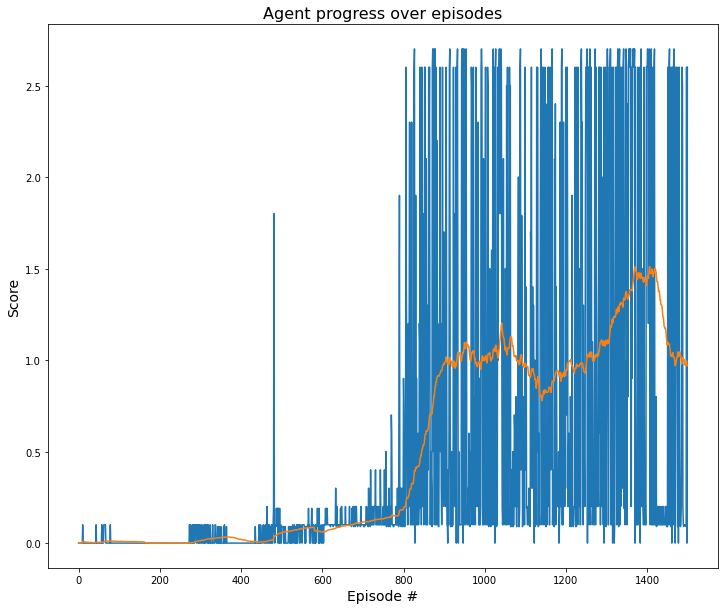

In [16]:
plot_scores(scores, avg_scores)

In [18]:
for i in range(num_agents):
    torch.save(driver.maddpg_agents[i].actor.state_dict(), f'./cp/agent-{i}-checkpoint_actor.pth')
    torch.save(driver.maddpg_agents[i].critic.state_dict(), f'./cp/agent-{i}-checkpoint_critic.pth')

In [21]:
def play(
    driver :MADDPG,
    env,
    n_episodes=1000, 
    max_t=300
    ):
    scores_window = deque(maxlen=100)
    scores = []
    avg_scores = []
    with tqdm(total=n_episodes) as progress:
        for i_episode in range(1, n_episodes+1):
            env_info = env.reset(train_mode=False)[brain_name]
            
            states = env_info.vector_observations
            num_agents = len(env_info.agents)
            score = np.zeros(num_agents)
            driver.reset_noise()
            
            for t in range(max_t):
                actions = driver.act(states, add_noise=False)
                env_info = env.step(actions)[brain_name]
                next_states = env_info.vector_observations
                rewards = env_info.rewards
                rewards = np.expand_dims(np.asanyarray(rewards), axis=1)
                dones = env_info.local_done
                dones = np.expand_dims(np.asanyarray(dones), axis=1)

                states = next_states
                score += np.squeeze(rewards)
                if np.any(dones):
                    break

            score = np.max(score) 
            scores_window.append(score)
            scores.append(score)
            
            avg_score = np.mean(scores_window)
            avg_scores.append(avg_score)
            
            
            progress.set_postfix({"Avg. Score": f"{avg_score:.2f}"})
            progress.update()
  
    return scores, avg_scores

In [22]:
p_scores, p_avg_scores = play(driver, env, n_episodes=5, max_t=150)

100%|██████████| 5/5 [00:48<00:00,  9.71s/it, Avg. Score=0.28]
